In [ ]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import glob



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
files=glob.glob('/content/drive/My Drive/Data/emotion_classification/train/*.gif')

# **Reading Train Data**

In [ ]:
from PIL import Image
i=[]
y=[]
for file in files:
  i.append(np.array(Image.open(file)).flatten())
  if file.find("sad")!=-1:
    y.append(0)
  else:
    y.append(1)
print(y)
x=np.array(i)

[0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]


In [ ]:
x.shape


(20, 10201)

In [ ]:
K=17

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_std=scaler.transform(x)


# **PCA**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=K)
pca.fit(x_std)

X_pca=pca.transform(x_std)

# **Reading test data**

In [ ]:
from PIL import Image
i_test=[]
y_test=[]
files=glob.glob('/content/drive/My Drive/Data/emotion_classification/test/*.gif')
for file in files:
  i_test.append(np.array(Image.open(file)).flatten())
  if file.find("sad")!=-1:
    y_test.append(0)
  else:
    y_test.append(1)
x_test=np.array(i_test)


In [ ]:
x_test_std=scaler.transform(x_test)

In [ ]:
X_test_pca=pca.transform(x_test_std)

In [ ]:
X_test_pca.shape

(10, 17)

# **SVM implementation**

In [ ]:
c_value=[0.5,1,5,10,50,100,150,200,250,300]
epsilon=[0.001,0.002,0.004,0.06,0.008,0.01]

# **Linear Kernel**

In [ ]:
from sklearn import svm
acc=[]
for i in c_value:
  linear_svm = svm.SVC(C=i,kernel="linear")
  linear_svm.fit(X_pca,y)
  accuracy=linear_svm.score(X_test_pca,y_test)
  print("value of C =",i)
  #accuracy on train data
  print("Linear SVM train accuracy:",linear_svm.score(X_pca,y))
  
  #accuracy on test data
  print("Linear SVM test accuracy:",linear_svm.score(X_test_pca,y_test))
  acc.append(linear_svm.score(X_test_pca,y_test))



value of C = 0.5
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of C = 1
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of C = 5
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of C = 10
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of C = 50
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of C = 100
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of C = 150
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of C = 200
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of C = 250
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of C = 300
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9


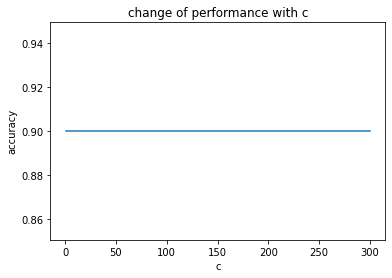

In [ ]:
import matplotlib.pyplot as plt
plt.plot(c_value,acc,label="value of epsilon=0.001 and K=17")
plt.title("change of performance with c")
plt.xlabel('c')
plt.ylabel('accuracy')

plt.show()

In [ ]:
acc1=[]
for i in epsilon:
  linear_svm = svm.SVC(C=5.0,kernel="linear",tol=i)
  linear_svm.fit(X_pca,y)
  accuracy=linear_svm.score(X_test_pca,y_test)
  print("value of epsilon =",i)
  #accuracy on train data
  print("Linear SVM train accuracy:",linear_svm.score(X_pca,y))
  
  #accuracy on test data
  print("Linear SVM test accuracy:",linear_svm.score(X_test_pca,y_test))
  acc1.append(linear_svm.score(X_test_pca,y_test))



value of epsilon = 0.001
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of epsilon = 0.002
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of epsilon = 0.004
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of epsilon = 0.06
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of epsilon = 0.008
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9
value of epsilon = 0.01
Linear SVM train accuracy: 1.0
Linear SVM test accuracy: 0.9


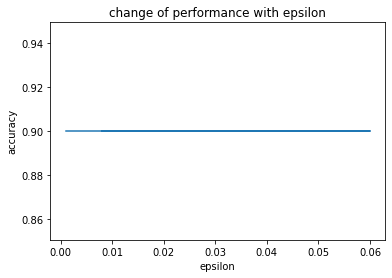

In [ ]:
plt.plot(epsilon,acc1)
plt.title("change of performance with epsilon")
plt.xlabel('epsilon')
plt.ylabel('accuracy')

plt.show()

# **Poly Kernel**

In [ ]:
from sklearn import svm
acc=[]
for i in c_value:
  poly_svm = svm.SVC(C=i,kernel="poly")
  poly_svm.fit(X_pca,y)
  print("value of C=",i)
  #accuracy on train data
  print("poly SVM train accuracy:",poly_svm.score(X_pca,y))
  #accuracy on test data
  print("poly SVM test accuracy:",poly_svm.score(X_test_pca,y_test))
  acc.append(poly_svm.score(X_test_pca,y_test))




value of C= 0.5
poly SVM train accuracy: 0.65
poly SVM test accuracy: 0.4
value of C= 1
poly SVM train accuracy: 0.8
poly SVM test accuracy: 0.4
value of C= 5
poly SVM train accuracy: 0.95
poly SVM test accuracy: 0.5
value of C= 10
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.5
value of C= 50
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.6
value of C= 100
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.6
value of C= 150
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.6
value of C= 200
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.6
value of C= 250
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.6
value of C= 300
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.6


In [ ]:
acc1=[]
for i in epsilon:
  poly_svm = svm.SVC(C=10,kernel="poly",tol=i)
  poly_svm.fit(X_pca,y)
  print("value of epsilon=",i)
  #accuracy on train data
  print("poly SVM train accuracy:",poly_svm.score(X_pca,y))
  #accuracy on test data
  print("poly SVM test accuracy:",poly_svm.score(X_test_pca,y_test))
  acc1.append(poly_svm.score(X_test_pca,y_test))


value of epsilon= 0.001
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.5
value of epsilon= 0.002
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.5
value of epsilon= 0.004
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.5
value of epsilon= 0.06
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.5
value of epsilon= 0.008
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.5
value of epsilon= 0.01
poly SVM train accuracy: 1.0
poly SVM test accuracy: 0.5


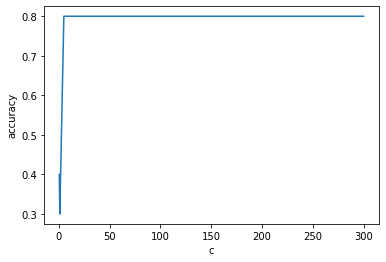

In [ ]:
import matplotlib.pyplot as plt
plt.plot(c_value,acc)
plt.xlabel('c')
plt.ylabel('accuracy')

plt.show()

In [ ]:
acc

[0.4, 0.3, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]

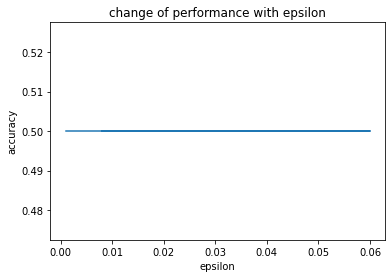

In [ ]:
plt.plot(epsilon,acc1)
plt.title("change of performance with epsilon")
plt.xlabel('epsilon')
plt.ylabel('accuracy')

plt.show()

# **RBF Kernel**

In [ ]:
from sklearn import svm
acc=[]
for i in c_value:
  rbf_svm = svm.SVC(C=i,kernel="rbf")
  rbf_svm.fit(X_pca,y)
  print("value of C=",i)
  #accuracy on train data
  print("rbf SVM train accuracy:",rbf_svm.score(X_pca,y))

  #accuracy on test data
  print("rbf SVM test accuracy:",rbf_svm.score(X_test_pca,y_test))
  acc.append(rbf_svm.score(X_test_pca,y_test))



value of C= 0.5
rbf SVM train accuracy: 0.55
rbf SVM test accuracy: 0.4
value of C= 1
rbf SVM train accuracy: 0.95
rbf SVM test accuracy: 0.3
value of C= 5
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of C= 10
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of C= 50
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of C= 100
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of C= 150
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of C= 200
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of C= 250
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of C= 300
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8


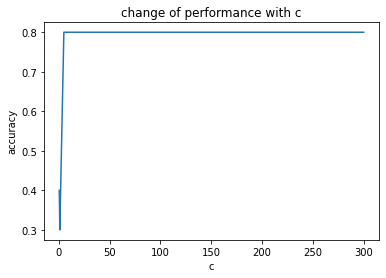

In [ ]:
import matplotlib.pyplot as plt
plt.plot(c_value,acc)
plt.title("change of performance with c")
plt.xlabel('c')
plt.ylabel('accuracy')

plt.show()

In [ ]:
acc1=[]
for i in epsilon:
  rbf_svm = svm.SVC(C=5,kernel="rbf",tol=i)
  rbf_svm.fit(X_pca,y)
  print("value of epsilon=",i)
  #accuracy on train data
  print("rbf SVM train accuracy:",rbf_svm.score(X_pca,y))

  #accuracy on test data
  print("rbf SVM test accuracy:",rbf_svm.score(X_test_pca,y_test))
  acc1.append(rbf_svm.score(X_test_pca,y_test))



value of epsilon= 0.001
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of epsilon= 0.002
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of epsilon= 0.004
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of epsilon= 0.06
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of epsilon= 0.008
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8
value of epsilon= 0.01
rbf SVM train accuracy: 1.0
rbf SVM test accuracy: 0.8


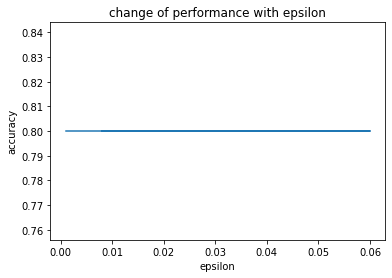

In [ ]:
plt.plot(epsilon,acc1)
plt.title("change of performance with epsilon")
plt.xlabel('epsilon')
plt.ylabel('accuracy')

plt.show()

# **LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA= LinearDiscriminantAnalysis()
LDA.fit(X_pca, y)

#accuracy on train data
print("LDA train accuracy:",LDA.score(X_pca,y))

#accuracy on test data
print("LDA test accuracy:",LDA.score(X_test_pca,y_test))


LDA train accuracy: 1.0
LDA test accuracy: 1.0


# **Dependence on K value**

In [ ]:
K=[2,4,6,8,10,12,14,16,18,20]

In [ ]:
acc_L=[]
acc_P=[]
acc_R=[]
for i in K:
  pca=PCA(n_components=i)
  pca.fit(x_std)
  X_pca=pca.transform(x_std)
  X_test_pca=pca.transform(x_test_std)

  #linear
  linear_svm = svm.SVC(C=5,kernel="linear",tol=i)
  linear_svm.fit(X_pca,y)
  acc_L.append(linear_svm.score(X_test_pca,y_test))

  #poly

  poly_svm = svm.SVC(C=5,kernel="poly",tol=0.001)
  poly_svm.fit(X_pca,y)
  acc_P.append(poly_svm.score(X_test_pca,y_test))

  #RBF
  rbf_svm = svm.SVC(C=5,kernel="rbf",tol=0.001)
  rbf_svm.fit(X_pca,y)
  acc_R.append(rbf_svm.score(X_test_pca,y_test))









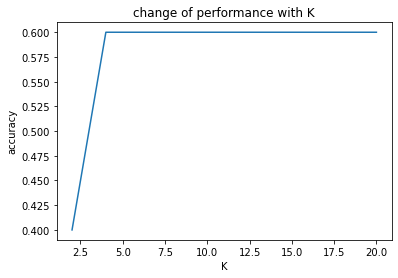

In [ ]:
plt.plot(K,acc_L)
plt.title("change of performance with K")
plt.xlabel('K')
plt.ylabel('accuracy')

plt.show()

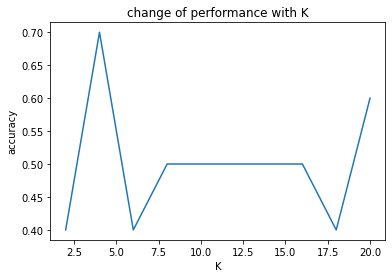

In [ ]:
plt.plot(K,acc_P)
plt.title("change of performance with K")
plt.xlabel('K')
plt.ylabel('accuracy')

plt.show()

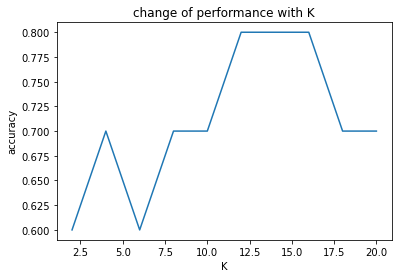

In [ ]:
plt.plot(K,acc_R)
plt.title("change of performance with K")
plt.xlabel('K')
plt.ylabel('accuracy')

plt.show()

# **question 4 part b**

In SVM classifier ,we find the hyperplane seperating the two classes such that the marging of classifier is maximum.margin is defined as the distance of the closest point to the hyperplane.only the data points which lies on support line will affect the decison boundary.

In LDA classifier,LDA is Similiar to PCA but it accounts the classes also.LDA assumes that the class conditional probability distribution are normal(Gausian) distribution.

SVM works generally better than LDA Classifier.